<a href="https://colab.research.google.com/github/PrzemyslawSarnacki/streetlifting-analysis/blob/main/coefficients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/PrzemyslawSarnacki/streetlifting-analysis/blob/main/coefficients.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a> 

In [2]:
import math

# calculate allometric scaling score 
def calculate_as(bodyweight, weight_lifted):
  return weight_lifted * bodyweight ** (-2/3)

def calculate_wilks(bodyweight, weight_lifted):
  result = weight_lifted*500/ (-216.0475144 + bodyweight*16.2606339 + bodyweight ** 2 *-0.002388645 + bodyweight ** 3 * -0.00113732 + bodyweight ** 4 * 7.01863E-06 + bodyweight ** 5 * -1.291E-08)
  return result

def calculate_isf(bodyweight, weight_lifted):
  a = 799.81893
  b = 681.45441
  c = 0.00614
  extra_points = 0
  if bodyweight > 95:
    extra_points = (bodyweight - 95) *0.5
  return (100/(a - b * math.exp(-c * bodyweight))) * weight_lifted + extra_points

def calculate_ipf(bodyweight, weight_lifted):
 a = 1199.72839 
 b = 1025.18162 
 c = 0.00921
 result = (100/(a - b * math.exp(-c * bodyweight))) * weight_lifted
 return result


In [8]:
def find_weight_lifted(score, bodyweight):
 return score / bodyweight ** (- 2/3)

In [9]:
find_weight_lifted(54.14, 123)

1339.023890753689

In [20]:
import pandas as pd

wilks = []
ipf  = []
isf = []
bodyweight = []
rows = []
for b in range(50, 120):
  isf = (calculate_isf(b, find_weight_lifted(54.14, b)))
  ipf = (calculate_ipf(b, find_weight_lifted(54.14, b)))
  wilks = (calculate_wilks(b, find_weight_lifted(54.14, b)))

  rows.append([b, wilks, isf, ipf])



df = pd.DataFrame(rows, columns=["bodyweight", "wilks", "isf", "ipf"])


,bodyweight,wilks,isf,ipf
0,50,751.814484,246.156329,132.904814
1,51,745.760658,246.889561,133.241846
2,52,740.138084,247.602406,133.573394
3,53,734.917410,248.296034,133.899890
4,54,730.072125,248.971544,134.221733
...,...,...,...,...
65,115,743.927498,286.241522,151.651839
66,116,746.531531,287.111870,151.943180
67,117,749.168696,287.981873,152.235135
68,118,751.837532,288.851573,152.527708


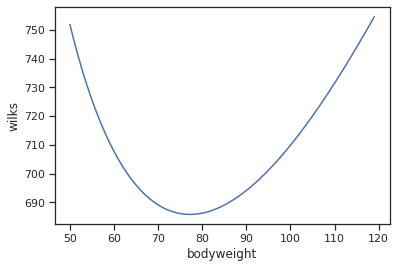

In [38]:
import seaborn as sns
sns.set("notebook", style='ticks', font_scale=1.0)

sns.lineplot(
    data=df,
    x="bodyweight", y="wilks", markers=True, dashes=False
)



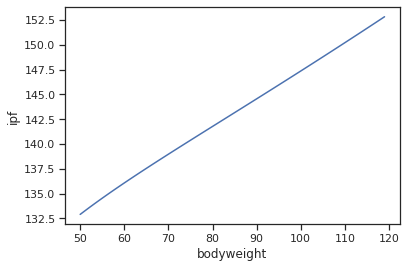

In [39]:
sns.lineplot(
    data=df,
    x="bodyweight", y="ipf", markers=True, dashes=False
)


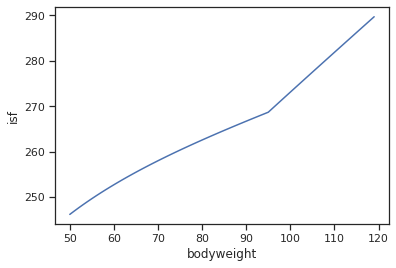

In [40]:
sns.lineplot(
    data=df,
    x="bodyweight", y="isf", markers=True, dashes=False
)

In [ ]:
wilks = []
ipf  = []
isf = []
bodyweight = []
rows = []
for b in range(50, 120):
  isf = (calculate_isf(b, find_weight_lifted(54.14, b)))
  ipf = (calculate_ipf(b, find_weight_lifted(54.14, b)))
  wilks = (calculate_wilks(b, find_weight_lifted(54.14, b)))

  rows.append([b, wilks, isf, ipf])



df = pd.DataFrame(rows, columns=["bodyweight", "wilks", "isf", "ipf"])